In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load
import matplotlib.pyplot as plt

In [2]:
data = 'bank_personal_loan.csv'
df = pd.read_csv(data)
df = df[df['Experience'] >= 0].reset_index(drop=True)

In [3]:
print(df.shape)
print(df.info())
display(df.head())

(4948, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4948 non-null   int64  
 1   Age                 4948 non-null   int64  
 2   Experience          4948 non-null   int64  
 3   Income              4948 non-null   int64  
 4   ZIP Code            4948 non-null   int64  
 5   Family              4948 non-null   int64  
 6   CCAvg               4948 non-null   float64
 7   Education           4948 non-null   int64  
 8   Mortgage            4948 non-null   int64  
 9   Personal Loan       4948 non-null   int64  
 10  Securities Account  4948 non-null   int64  
 11  CD Account          4948 non-null   int64  
 12  Online              4948 non-null   int64  
 13  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 541.3 KB
None


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
drop_cols = ['ID', 'ZIP Code', 'Personal Loan']
X = df.drop(columns=drop_cols)
y = df['Personal Loan']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=10, stratify=y)
print(X_train.shape[0])

3612


In [6]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=9)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=9)

最も重要な特徴量: Income, 重要度: 0.34


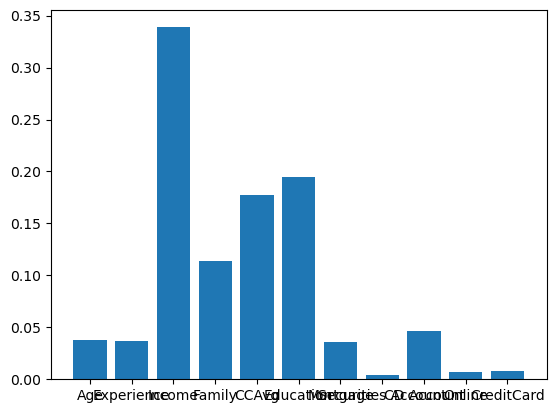

In [7]:
importances = rfc.feature_importances_
features = X_train.columns
plt.bar(features, importances)

max_idx = np.argmax(importances)
max_feature = features[max_idx]
max_importance = importances[max_idx]
print(f"最も重要な特徴量: {max_feature}, 重要度: {max_importance:.2f}")


In [8]:
y_train_pred = rfc.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f"訓練データ accuracy: {acc_train:.2f}")
y_test_pred = rfc.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f"テストデータ accuracy: {acc_test:.2f}")

訓練データ accuracy: 1.00
テストデータ accuracy: 0.99


In [9]:
dump(rfc, 'rfc_bank_loan.joblib')

['rfc_bank_loan.joblib']